# Economic charting with `ggplot2` in R
The following chart types/topics are covered:
- Line graphs - using unemployment and inflation data;
- Bar charts - using stock returns;
- Stacked bar - chart using US trade data.

In [40]:
# Load necessary libraries
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(magrittr))
suppressPackageStartupMessages(library(lubridate))

In [41]:
# Set plot dimensions to 3.9*2 x 3.2 inches
options(repr.plot.width = 3.9*2, repr.plot.height = 3.2*2)  # in inches

# Line graphs
I will be plotting data from the [Consumer Price Index for All Urban Consumers](https://fred.stlouisfed.org/graph/?g=1wmdD) and the [Unemployment Rate](https://fred.stlouisfed.org/series/UNRATE) from FRED via the `quantmod` library.

In [42]:
# Get data from FRED using quantmod
suppressPackageStartupMessages(library(quantmod))

# Example: US CPI & UNRATE
getSymbols(c("CPIAUCSL", "UNRATE"), src = "FRED")

[1] "CPIAUCSL" "UNRATE"

The chart below shows the percent change in the CPI from a year ago starting with the Jan. 2000 data point and ending with the latest data point.

Warning message:
“Removed 636 rows containing missing values or values outside the scale range
(`geom_line()`).”


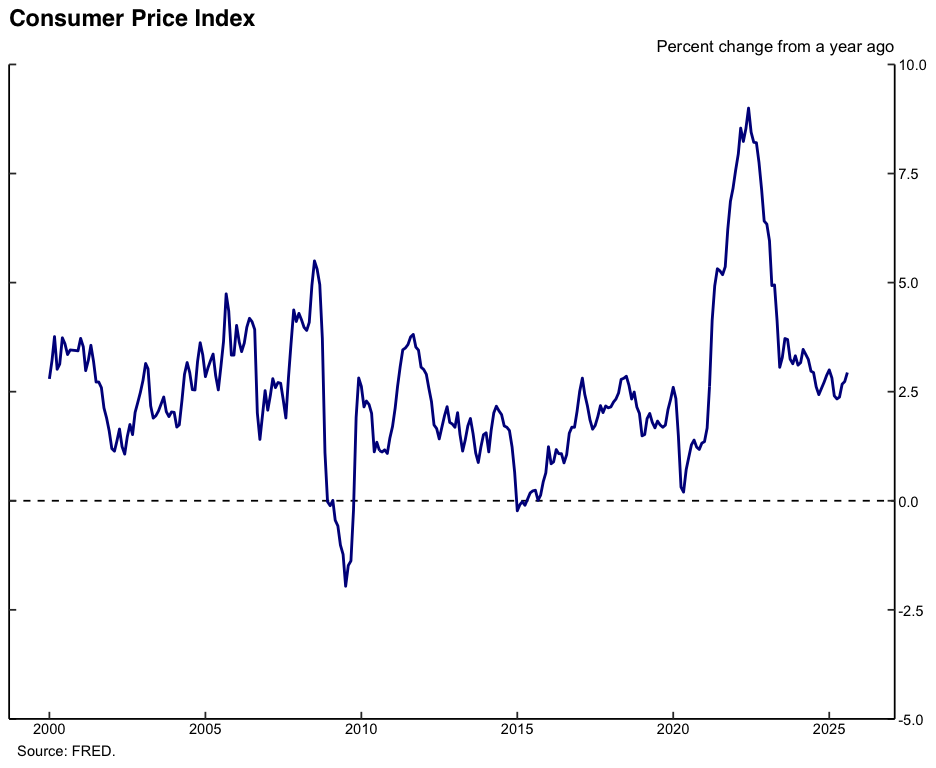

In [43]:
# Convert xts type CPIAUCSL to data frame
df <- data.frame(date = index(CPIAUCSL), coredata(CPIAUCSL))

# Calcualte a percent change from a year ago
df <- df %>% mutate(pct_chg = (CPIAUCSL / lag(CPIAUCSL, 12) - 1) * 100)

# Set plot start and end dates
start_date = as.Date("2000-01-01")
end_date = Sys.Date()

# Set the x-axis step size
x_step = "5 years"

# Make line chart
plot_1 <- df %>% ggplot() + 
geom_hline(yintercept = 0, linetype = "dashed", linewidth = 0.5, color = "black") +
geom_line(aes(x = date, y = pct_chg), linewidth=0.8, color="darkblue") +
  scale_x_date(
    date_labels = "%Y", 
    breaks = seq.Date(from = start_date, to = end_date, by = x_step), 
    limits = c(start_date, end_date)
    ) +
  scale_y_continuous(
    position = "right",
    sec.axis = dup_axis(labels = NULL),
    breaks = seq(-5, 10, by = 2.5),
    limits = c(-5, 10),
    expand = c(0, 0)
    ) +
    xlab(NULL) + ylab(NULL) +
  labs(title = "Consumer Price Index", subtitle = "Percent change from a year ago", caption = "  Source: FRED.") +
  theme_classic() +
  theme(
    plot.title = element_text(family = "Helvetica", face = "bold", size = 14),
    plot.subtitle = element_text(hjust = 1, size = 10),
    axis.text = element_text(color = "black"),
    axis.ticks.length = unit(-0.15, "cm"),
    plot.caption = element_text(hjust = 0)
    )

plot_1

The chart below shows the percent change from a year ago in the CPI and the unemployment rate.

The dashed red and blue lines are the "natural rate of unemployment" and the Fed's inflation target, respectively. 

Although the exact figure for the "natural rate of unemployment" is unkown, it usually hovers between four and five percent. 

In this chart, I plotted it at 5%. The inflation target is plotted at 2%.

Warning message:
“Removed 1272 rows containing missing values or values outside the scale range
(`geom_line()`).”


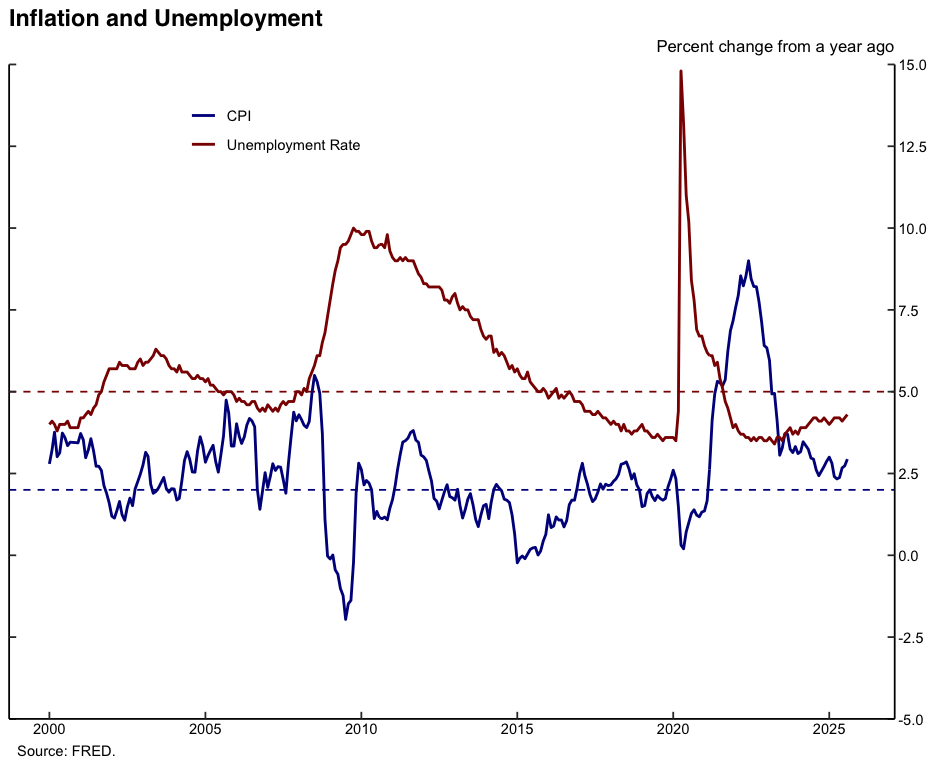

In [44]:
df <- full_join(
  data.frame(date = index(CPIAUCSL), coredata(CPIAUCSL)),
  data.frame(date = index(UNRATE), coredata(UNRATE)),
  by = "date"
)

df <- df %>% mutate(CPIAUCSL = (CPIAUCSL / lag(CPIAUCSL, 12) - 1) * 100)

df <- df %>% pivot_longer(-date)

# Set plot start and end dates
start_date = as.Date("2000-01-01")
end_date = Sys.Date()

# Set the x-axis step size
x_step = "5 years"

# Make line chart
plot_2 <- df %>% ggplot() + 
geom_hline(yintercept = 2, linetype = "dashed", linewidth = 0.5, color = "darkblue") +
geom_hline(yintercept = 5, linetype = "dashed", linewidth = 0.5, color = "darkred") +
geom_line(aes(x = date, y = value, color=name), linewidth=0.8) +
  scale_x_date(
    date_labels = "%Y", 
    breaks = seq.Date(from = start_date, to = end_date, by = x_step), 
    limits = c(start_date, end_date)
    ) +
  scale_y_continuous(
    position = "right",
    sec.axis = dup_axis(labels = NULL),
    breaks = seq(-5, 15, by = 2.5),
    limits = c(-5, 15),
    expand = c(0, 0)
    ) +
    scale_color_manual(
      NULL,
      values = c("CPIAUCSL" = "darkblue", "UNRATE" = "darkred"),
      labels = c("CPIAUCSL" = "CPI", "UNRATE" = "Unemployment Rate")
    ) +
    xlab(NULL) + ylab(NULL) +
  labs(title = "Inflation and Unemployment", subtitle = "Percent change from a year ago", caption = "  Source: FRED.") +
  theme_classic() +
  theme(
    plot.title = element_text(family = "Helvetica", face = "bold", size = 14),
    plot.subtitle = element_text(hjust = 1, size = 10),
    axis.text = element_text(color = "black"),
    axis.ticks.length = unit(-0.15, "cm"),
    plot.caption = element_text(hjust = 0),
    legend.position = c(0.3, 0.9)
    )

plot_2


The chart below shows the percent change in the unemployment rate and the percent change of the YoY CPI from their "pre-pandemic" levels (Feb. 2020). 

At its very worst, the rate of unemployment was over 400%, or over 4x, its pre-pandemic level. Similarly, the CPI at its very highest was increasing at a rate just under 4x its pre-pandemic pace. More recent data points (as of Aug. 2025) are very close to their pre-pandemic levels.

Warning message:
“Removed 1752 rows containing missing values or values outside the scale range
(`geom_line()`).”


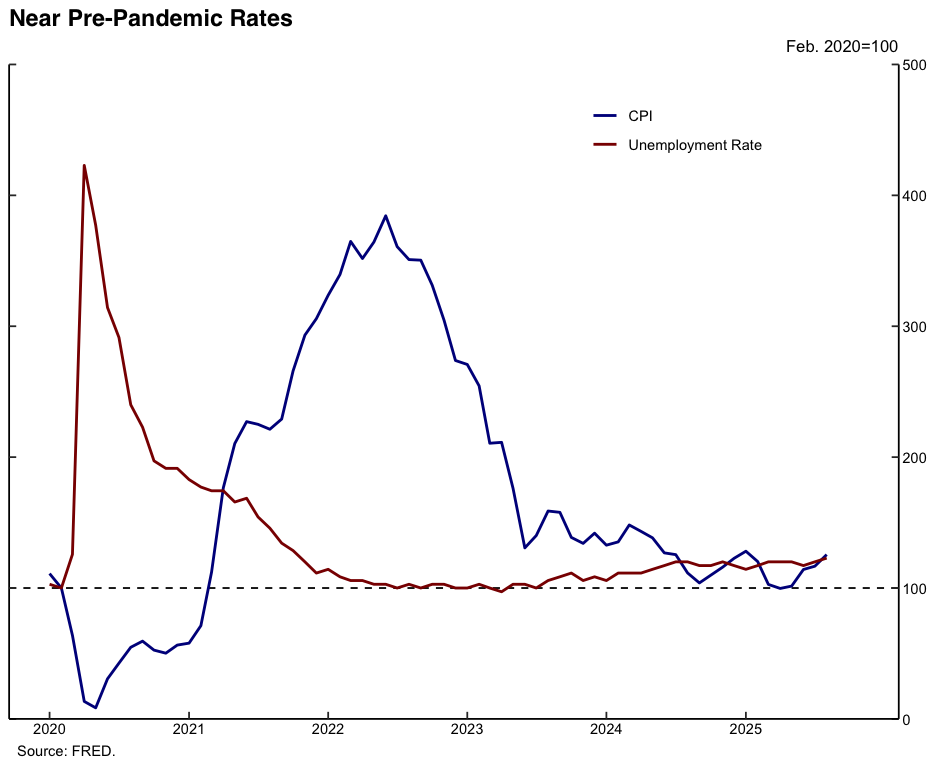

In [45]:
# Join CPI and UNRATE data
df <- full_join(
  data.frame(date = index(CPIAUCSL), coredata(CPIAUCSL)),
  data.frame(date = index(UNRATE), coredata(UNRATE)),
  by = "date"
)

# Convert CPIAUCSL to percent change from a year ago, then pivot longer, and finally normalize to February 2020
df <- df %>% mutate(CPIAUCSL = (CPIAUCSL / lag(CPIAUCSL, 12) - 1) * 100)
df <- df %>% pivot_longer(-date)
df <- df %>% group_by(name) %>% mutate(value = (value/value[which(date==as.Date("2020-02-01"))])*100)

# Check if February 2020 is equal to 100
# df[year(df$date)==2020, ]

# Set plot start and end dates
start_date = as.Date("2020-01-01")
end_date = Sys.Date()

# Set the x-axis step size
x_step = "1 years"

# Make line chart
plot_3 <- df %>% ggplot() + 
geom_hline(yintercept = 100, linetype = "dashed", linewidth = 0.5, color = "black") +
geom_line(aes(x = date, y = value, color=name), linewidth=0.8) +
  scale_x_date(
    date_labels = "%Y", 
    breaks = seq.Date(from = start_date, to = end_date, by = x_step), 
    limits = c(start_date, end_date)
    ) +
  scale_y_continuous(
    position = "right",
    sec.axis = dup_axis(labels = NULL),
    breaks = seq(0, 500, by = 100),
    limits = c(0, 500),
    expand = c(0, 0)
    ) +
    scale_color_manual(
      NULL,
      values = c("CPIAUCSL" = "darkblue", "UNRATE" = "darkred"),
      labels = c("CPIAUCSL" = "CPI", "UNRATE" = "Unemployment Rate")
    ) +
    xlab(NULL) + ylab(NULL) +
  labs(title = "Near Pre-Pandemic Rates", subtitle = "Feb. 2020=100", caption = "  Source: FRED.") +
  theme_classic() +
  theme(
    plot.title = element_text(family = "Helvetica", face = "bold", size = 14),
    plot.subtitle = element_text(hjust = 1, size = 10),
    axis.text = element_text(color = "black"),
    axis.ticks.length = unit(-0.15, "cm"),
    plot.caption = element_text(hjust = 0),
    legend.position = c(0.75, 0.9)
    )

plot_3


# Bar Charts
I will be plotting the annual returns of the S&P 500 from Yahoo Finance.

In [46]:
# Load in SPX data from Yahoo Finance
getSymbols(c("^GSPC"), src = "yahoo", from = "2000-01-01")
head(GSPC)
tail(GSPC)

[1] "GSPC"

           GSPC.Open GSPC.High GSPC.Low GSPC.Close GSPC.Volume GSPC.Adjusted
2000-01-03   1469.25   1478.00  1438.36    1455.22   931800000       1455.22
2000-01-04   1455.22   1455.22  1397.43    1399.42  1009000000       1399.42
2000-01-05   1399.42   1413.27  1377.68    1402.11  1085500000       1402.11
2000-01-06   1402.11   1411.90  1392.10    1403.45  1092300000       1403.45
2000-01-07   1403.45   1441.47  1400.73    1441.47  1225200000       1441.47
2000-01-10   1441.47   1464.36  1441.47    1457.60  1064800000       1457.60

           GSPC.Open GSPC.High GSPC.Low GSPC.Close GSPC.Volume GSPC.Adjusted
2025-10-15   6688.27   6724.12  6612.11    6671.06  5633060000       6671.06
2025-10-16   6689.02   6709.34  6593.99    6629.07  6048180000       6629.07
2025-10-17   6613.27   6678.88  6603.76    6664.01  5358120000       6664.01
2025-10-20   6690.05   6744.35  6690.05    6735.13  4672170000       6735.13
2025-10-21   6736.75   6752.16  6722.03    6735.35  5245020000       6735.35
2025-10-22   6741.34   6741.75  6655.69    6699.40  5710010000       6699.40

I will take closing prices at the start and end of each year returned by the `quantmod` library. Then, I will calculate the annual return using last year's close price and this year's close price.

In [47]:
# Calculate the annual return year each year
df <- data.frame(date = index(GSPC), coredata(GSPC))
df_year <- df %>% 
select(date, GSPC.Close) %>%
arrange(date) %>%
na.omit() %>%
mutate(year = year(date)) %>% 
group_by(year) %>% 
slice(c(1, n())) %>% 
reframe(pct_chg = (last(GSPC.Close) - first(GSPC.Close)) / first(GSPC.Close) * 100)

# View table of annual returns
head(df_year)
tail(df_year)

# Since 2000, the average annual return of the S&P 500 is 7%
mean(df_year$pct_chg, na.rm = TRUE)


year,pct_chg
<dbl>,<dbl>
2000,-9.272821
2001,-10.534810
2002,-23.803340
2003,22.319396
2004,9.331703
2005,3.844177


year,pct_chg
<dbl>,<dbl>
2020,15.29291
2021,28.79306
2022,-19.95305
2023,24.72949
2024,24.01098
2025,14.15767


[1] 7.209171

Now I will plot the annual return for each year in a bar chart.

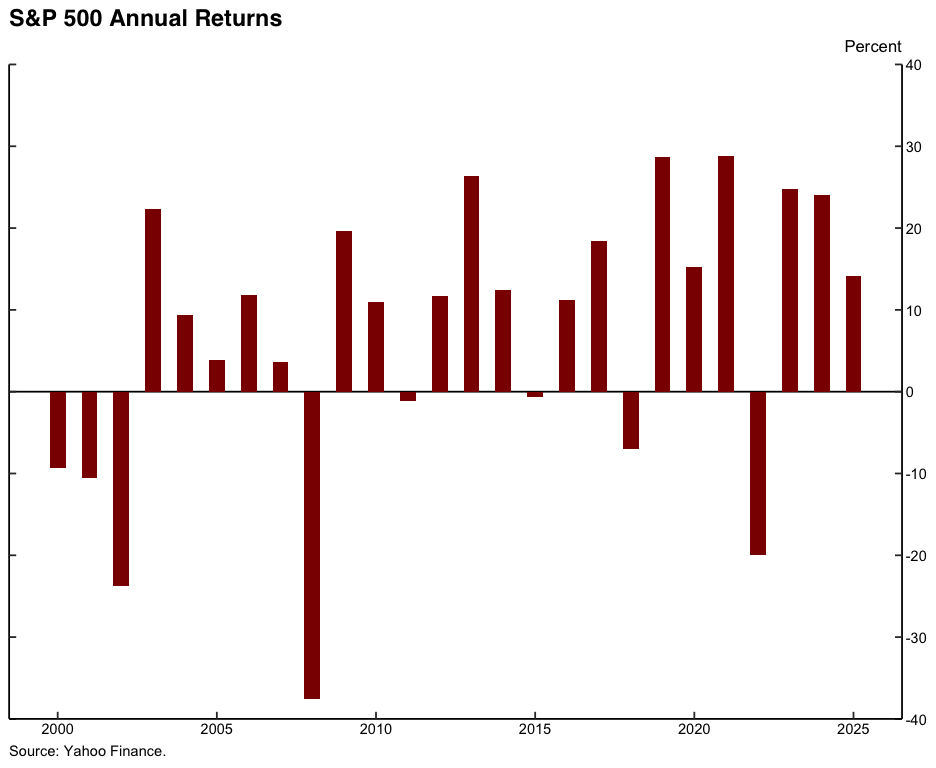

In [48]:
plot_4 <- df_year %>% ggplot() + 
  geom_hline(yintercept = 0, linewidth = 0.5, color = "black") +
  geom_col(aes(x = year, y = pct_chg), fill = "darkred", width = 0.5) +
  scale_x_continuous(breaks = seq(1990, 2025, by = 5)) +
  scale_y_continuous(
    position = "right",
    sec.axis = dup_axis(labels = NULL),
    breaks = seq(-40, 40, by = 10),
    limits = c(-40, 40),
    expand = c(0, 0)
    ) +
  xlab(NULL) + ylab(NULL) +
  labs(
    title = "S&P 500 Annual Returns", 
    subtitle = "Percent", 
    caption = "Source: Yahoo Finance."
    ) +
  theme_classic() +
  theme(
      plot.title = element_text(family = "Helvetica", face = "bold", size = 14),
      plot.subtitle = element_text(hjust = 1, size = 10),
      axis.text = element_text(color = "black"),
      axis.ticks.length = unit(-0.15, "cm"),
      plot.caption = element_text(hjust = 0)
      )

plot_4  

# Stacked Bar Chart
I will plot U.S. steel imports in billions of dollars using the Census Bureau's API via the `censusapi` library. The documentation for the library can be found [here](https://cran.r-project.org/web/packages/censusapi/censusapi.pdf) and the documentation for the Census' API can be found [here](https://www.census.gov/foreign-trade/reference/guides/Guide_to_International_Trade_Datasets.pdf).

In [49]:
install.packages("censusapi")


The downloaded binary packages are in
	/var/folders/k8/m_cj3fd55_gfbq5cbxf64yg80000gn/T//RtmpMfBoGs/downloaded_packages


Store personal Census API key in '.Renviron' file. This function checks if the key is stored correctly.

In [50]:
censusapi::has_api_key()

[1] TRUE

Example code taken from censusapi examples [here](https://www.hrecht.com/censusapi/articles/example-list.html#international-trade) to check proper functioning of the library.

In [51]:
poverty_rate <- censusapi::getCensus(
    name = "timeseries/poverty/saipe",
    vars = c("NAME", "SAEPOVRTALL_PT"),
    region = "county:037",
    regionin = "state:06",
    time = "from 2010")

poverty_rate

time,state,county,NAME,SAEPOVRTALL_PT
<int>,<chr>,<chr>,<chr>,<dbl>
2010,06,037,Los Angeles County,17.6
2011,06,037,Los Angeles County,18.4
2012,06,037,Los Angeles County,19.1
2013,06,037,Los Angeles County,19.0
2014,06,037,Los Angeles County,18.7
2015,06,037,Los Angeles County,16.7
2016,06,037,Los Angeles County,16.3
2017,06,037,Los Angeles County,14.9
2018,06,037,Los Angeles County,14.2


Check metadata in import data provided by Census Bureau.

In [52]:
# meta_data <- censusapi::listCensusMetadata(name="timeseries/intltrade/imports/hs", type="variables")
# meta_data[,c(1,2)]
print("")

[1] ""


Attempt querry on import data provided by Census Bureau.

In [53]:
imports <- censusapi::getCensus(
    name = "timeseries/intltrade/imports/enduse",
    vars = c("CTY_CODE", "CTY_NAME", "GEN_VAL_MO", "CON_VAL_MO"),
    time = "2024-01")
head(imports)

,time,CTY_CODE,CTY_NAME,GEN_VAL_MO,CON_VAL_MO
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,2024-01,-,TOTAL FOR ALL COUNTRIES,253692671061,254282909564
2,2024-01,0003,EUROPEAN UNION,46462552767,46186075157
3,2024-01,0014,PACIFIC RIM COUNTRIES,79475175773,79024298812
4,2024-01,0017,CAFTA-DR,2476381523,2471197017
5,2024-01,0020,USMCA (NAFTA),71358714212,71239384038
6,2024-01,0021,TWENTY LATIN AMERICAN REPUBLICS,50033637626,50374060112


Filter for iron and steel imports as tracked by HS code 72. Remove supranational entities.

In [54]:
steel_imports <- censusapi::getCensus(
    name = "timeseries/intltrade/imports/hs",
    vars = c("I_COMMODITY_SDESC", "CTY_CODE","CTY_NAME", "GEN_VAL_MO", "YEAR"),
    SUMMARY_LVL = "DET",
    I_COMMODITY = "72",
    time = "from 2015-01"
    )
head(steel_imports)

,time,I_COMMODITY_SDESC,CTY_CODE,CTY_NAME,GEN_VAL_MO,YEAR,SUMMARY_LVL,I_COMMODITY
,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<int>
1,2015-01,IRON AND STEEL,-,TOTAL FOR ALL COUNTRIES,3090001530,2015,DET,72
2,2015-01,IRON AND STEEL,6021,AUSTRALIA,45531260,2015,DET,72
3,2015-01,IRON AND STEEL,6141,NEW ZEALAND,9323372,2015,DET,72
4,2015-01,IRON AND STEEL,6412,NEW CALEDONIA,2874317,2015,DET,72
5,2015-01,IRON AND STEEL,7910,SOUTH AFRICA,115197530,2015,DET,72
6,2015-01,IRON AND STEEL,7960,ZIMBABWE,10764869,2015,DET,72


Identify top 6 importing countries versus rest of world. Aggregate by month-country pair and year-country pair in billions of dollars

In [55]:
top_6 <- steel_imports %>% 
filter(CTY_NAME != "TOTAL FOR ALL COUNTRIES") %>%
mutate(country = ifelse(CTY_NAME %in% c("CANADA", "MEXICO", "BRAZIL", "JAPAN", "GERMANY"), CTY_NAME, "REST OF WORLD")) %>%
group_by(country, time) %>%
reframe(total_imports = sum(as.numeric(GEN_VAL_MO))) %>%
mutate(date=as.yearmon(time))
# top_6

top_6_yr <- top_6 %>% 
mutate(year = year(date)) %>%
group_by(country, year) %>%
reframe(total_imports = sum(total_imports)/1000000000)  # in billions
# top_6_yr

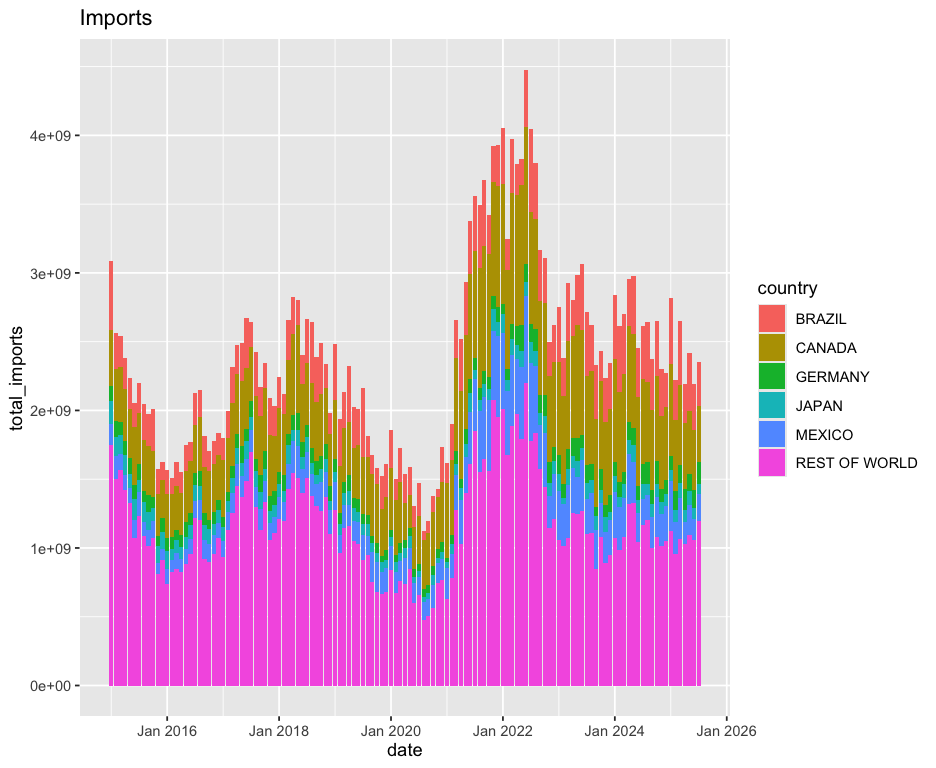

In [56]:
# options(repr.plot.width = 3.9*2, repr.plot.height = 3.2)  # in inches
top_6 %>% ggplot(aes(x=date, y=total_imports, fill=country)) + geom_bar(position="stack", stat="identity") + labs(title="Imports")

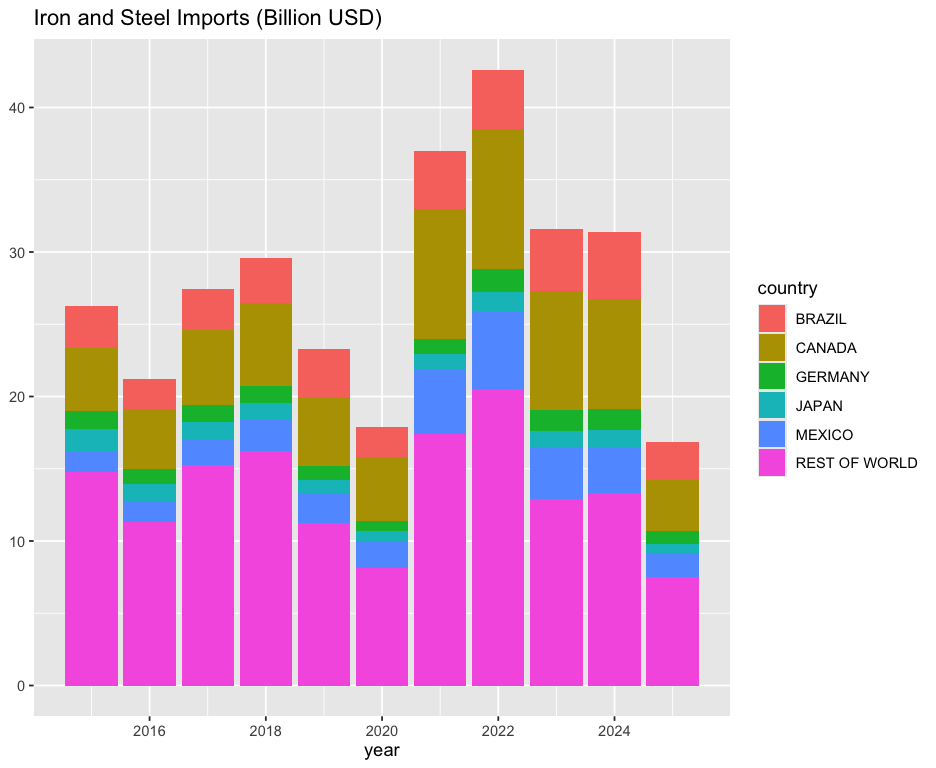

In [57]:
top_6_yr %>% ggplot(aes(x=year, y=total_imports, fill=country)) + 
geom_bar(position="stack", stat="identity") + 
labs(title="Iron and Steel Imports (Billion USD)", y=NULL)

Cleaned-up chart for total imports of iron and steel into the U.S. from top 5 countries and rest of world.

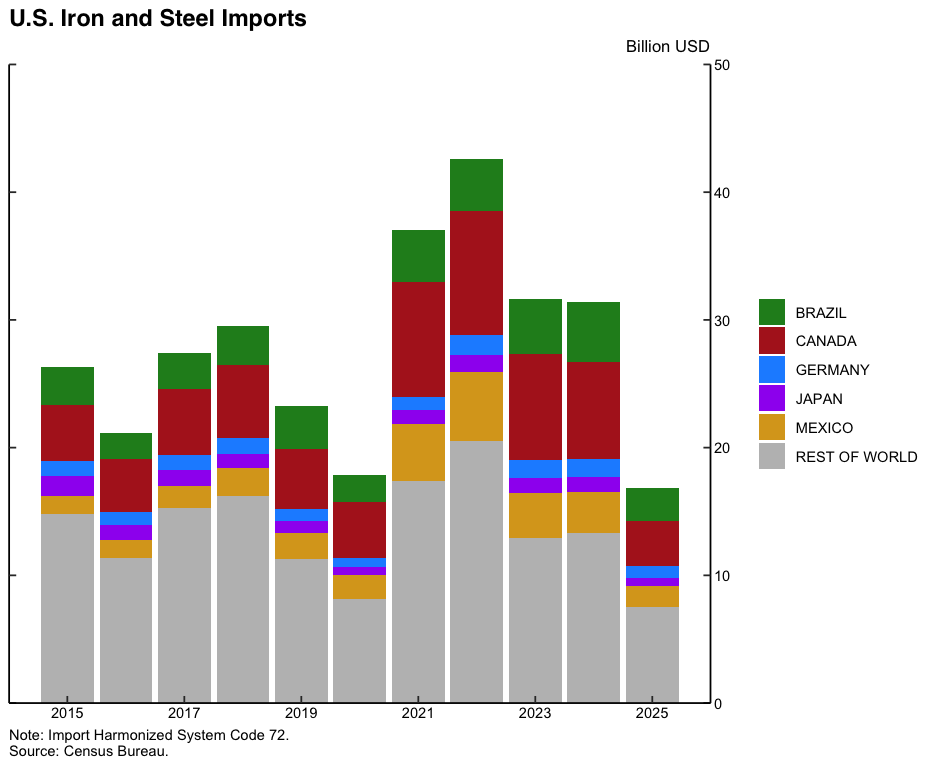

In [63]:
plot_5 <- top_6_yr %>%
  # geom_hline(yintercept = 0, linewidth = 0.5, color = "black") +
  ggplot(aes(x=year, y=total_imports, fill=country)) + 
  geom_bar(position="stack", stat="identity") +
  scale_x_continuous(breaks = seq(2011, 2025, by = 2)) +
  scale_y_continuous(
    position = "right",
    sec.axis = dup_axis(labels = NULL),
    breaks = seq(0, 50, by = 10),
    limits = c(0, 50),
    expand = c(0, 0)
    ) +
  scale_fill_manual(
    NULL,
    values = c(
      "CANADA" = "firebrick",
      "MEXICO" = "goldenrod",
      "BRAZIL" = "forestgreen",
      "JAPAN" = "purple",
      "GERMANY" = "dodgerblue",
      "REST OF WORLD" = "grey"
    )
  ) +
  xlab(NULL) + ylab(NULL) +
  labs(
    title = "U.S. Iron and Steel Imports", 
    subtitle = "Billion USD", 
    caption = "Note: Import Harmonized System Code 72.\nSource: Census Bureau."
    ) +
  theme_classic() +
  theme(
      plot.title = element_text(family = "Helvetica", face = "bold", size = 14),
      plot.subtitle = element_text(hjust = 1, size = 10),
      axis.text = element_text(color = "black"),
      axis.ticks.length = unit(-0.15, "cm"),
      plot.caption = element_text(hjust = 0)
      )

plot_5